## Cheese Segmentation using scikit-image

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, morphology
from skimage.segmentation import active_contour

### Load the Image

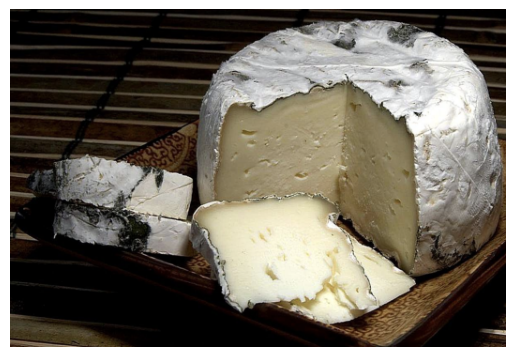

In [2]:
image_url = 'https://github.com/user-attachments/assets/8d1ba5c9-6ed8-426f-801c-1ed68d348e42'
image = io.imread(image_url)
plt.imshow(image)
plt.axis('off')
plt.savefig('original_image.png')
plt.show()

### Convert to Grayscale

In [3]:
gray_image = color.rgb2gray(image)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.savefig('grayscale_image.png')
plt.show()

ValueError: the input array must have size 3 along `channel_axis`, got (360, 529, 4)

### Apply Gaussian Filter

In [ ]:
blurred_image = filters.gaussian(gray_image, sigma=2)
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')
plt.savefig('blurred_image.png')
plt.show()

### Thresholding

In [ ]:
threshold_value = filters.threshold_otsu(blurred_image)
binary_image = blurred_image > threshold_value
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.savefig('binary_image.png')
plt.show()

### Morphological Operations

In [ ]:
cleaned_image = morphology.remove_small_objects(binary_image, min_size=64)
cleaned_image = morphology.remove_small_holes(cleaned_image, area_threshold=64)
plt.imshow(cleaned_image, cmap='gray')
plt.axis('off')
plt.savefig('cleaned_image.png')
plt.show()

### Active Contour Segmentation

In [ ]:
init = np.array([[150, 150], [300, 150], [300, 300], [150, 300]])
snake = active_contour(blurred_image, init, alpha=0.015, beta=10, gamma=0.001)
plt.imshow(image)
plt.plot(snake[:, 1], snake[:, 0], '-r', lw=2)
plt.axis('off')
plt.savefig('segmented_image.png')
plt.show()